<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_Exploratoria_de_Dados/blob/main/AED_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Probabilidade Condicionada, Bayes e Informação Mútua
---

Nesta aula você aprenderá:

* Como empregar com probabilidades condicionadas, além de revisitar alguns conceitos básicos de probabilidade
* O que é e como empregar o Teorema de Bayes
* Como obter e empregar a informação mútua para a seleção de atributos (*feature selection*) para Análise de Dados e para problemas de Aprendizado de Máquina

# Introdução

Nesta última aula você vai revisitar alguns conceitos de probabilidade para que possa fazer cálculos de probabilidade condicionadas e entender um importante teorema de probabilidades que é o teorema de Bayes. O teorema de Bayes constitui a base de toda uma abordagem estatística chamada estatística Basesiana (para diferenciar da estatística frequentista) que permite atualizarmos as probabilidades à medida que aprendemos ou adicionamos novas informações sobre os dados. 

Você também vai aprender aqui um pouco sobre como podemos medir a informação dos dados (conceito de Entropia) e como podemos determinar o quanto o valor de um atributo pode nos dizer sobre o valor de um outro. Essa medida, que chamaremos de informação mútua, está na base do que chamamos em aprendizado de máquina de *feature selection*, e pode fornecer vários insights importantes sobre os dados. 

# Revendo os Conceitos de Probabilidade

Na teoria da probabilidade o conceito de **espaço amostral** corresponde ao conjunto de todos os possíveis resultados de um experimento. Por exemplo, os código abaixo produzidos com o pacote `prob` do R, geram respectivamente os espaços amostrias de 3 lançamentos de moeda (8), 2 lançamentos de dados (36) e a escolha de uma carta em um baralho (54).

In [ ]:
install.packages('prob')
library(prob)

In [19]:
tosscoin(3)
nrow( tosscoin(3) )


toss1,toss2,toss3
<fct>,<fct>,<fct>
H,H,H
T,H,H
H,T,H
T,T,H
H,H,T
T,H,T
H,T,T
T,T,T


[1] 8

In [21]:
head(rolldie(2))
nrow(rolldie(2))

,X1,X2
,<int>,<int>
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1


[1] 36

In [24]:
head(cards(1))
nrow(cards(1)) 


,rank,suit
,<fct>,<fct>
1,2,Club
2,3,Club
3,4,Club
4,5,Club
5,6,Club
6,7,Club


[1] 54

Subconjuntos do espaço amostral são denominados **eventos**. Por exemplo, para os casos acima podemos pensar nos eventos onde o primeiro lançamento da moeda é coroa, o primeiro dado retorna 6 ou a carta é um valete.

In [26]:
subset(tosscoin(3), toss1 == 'T')
nrow( subset(tosscoin(3), toss1 == 'T') )

,toss1,toss2,toss3
,<fct>,<fct>,<fct>
2,T,H,H
4,T,T,H
6,T,H,T
8,T,T,T


[1] 4

In [30]:
head( subset(rolldie(2), X1 == 6) )
nrow( subset(rolldie(2), X1 == 6) )

,X1,X2
,<int>,<int>
6,6,1
12,6,2
18,6,3
24,6,4
30,6,5
36,6,6


[1] 6

In [31]:
head( subset(cards(1), rank == 'J') )
nrow( subset(cards(1), rank == 'J') )

,rank,suit
,<fct>,<fct>
10,J,Club
23,J,Diamond
36,J,Heart
49,J,Spade


[1] 4

A probabilidade de um evento $P(E)$ reflete a incerteza (ou a certeza) de que um evento ocorra de pode ser definida com base nos **axiomas de Probabilidade**.

Axiomas da probabilidade:

1. (A1):  $0 \le P(E) \le 1$

2. (A2): $P[Ø] = 0$ onde Ø é um evento vazio (impossível de ocorrer)

3. (A3): $P[S] = 1$ onde $S$ é o espaço amostral

4. (A4): $P[E] = \sum P(E_i)$ para toda divisão do evento $E$ em partes disjuntas, ou mutualmente exclusivas. 


Você deve lembrar que podemos associar à probabilidade à proporção que o evento representa dentro do espaço amostral. Podemos ver então que a probabilidade de termos quaisquer das combinações nos lançamentos dos dados é um valor entre 0 e 1 (A1), a probabilidade de termos o valor 7 no lançamento de um dado é 0 (A2), a probabilidade de tirarmos uma carta qualquer do baralho é 1 (A3) e a soma das probabilidades de tiramos uma figura do baralho é a soma das probabilidades de tirarmos quaisquer das suas figuras (A4, abaixo).

In [32]:
# Probabilidade de termos os lançamentos da moeda com coroa no primeiro lançamento (independe dos demais lançamentos!)
nrow( subset(tosscoin(3), toss1 == 'T') ) / nrow( tosscoin(3) )

[1] 0.5

In [36]:
# Consideramos A uma figura e Joker não
nrow( subset(cards(1), rank == 'J' | rank == 'K' | rank == 'Q' | rank == 'A' ) )/ nrow( cards(1) )

[1] 0.2962963

Que é igual a:

In [37]:
# Consideramos A uma figura e Joker não
nrow( subset(cards(1), rank == 'J' ) )/ nrow( cards(1) ) +
nrow( subset(cards(1), rank == 'K' ) )/ nrow( cards(1) ) +
nrow( subset(cards(1), rank == 'Q' ) )/ nrow( cards(1) ) +
nrow( subset(cards(1), rank == 'A' ) )/ nrow( cards(1) )

[1] 0.2962963

Esse último axioma é conhecido como **regra da adição para eventos mutuamente exclusivos**. Dois **eventos são complementares** quando são mutuamente exclusivos e a sua união é o espaço amostral. Isso significa dizer que:

$$ P(E) + P(\bar{E}) = P(S) $$

Onde $E \cup \bar{E} = S$  e $E \cap \bar{E} = S$ (disjuntos) e como a probabilidade do espaço amostral é 1 podemos escrever:

$$ P(E) = 1 - P(\bar{E})$$ 

Assim, a probabilidade de obtermos uma figura é exatamente 1 menos a probabilidade de não obtermos uma figura no baralho.

In [38]:
# Consideramos A uma figura e Joker não
nrow( subset(cards(1), rank == 'J' | rank == 'K' | rank == 'Q' | rank == 'A' ) )/ nrow( cards(1) )

[1] 0.2962963

In [40]:
1  - nrow( subset(cards(1), rank != 'J' & rank != 'K' & rank != 'Q' & rank != 'A' ) )/ nrow( cards(1) )

[1] 0.2962963

## Probabilidade de União de Eventos

Mas nem sempre você vai encontrar eventos disjuntos e o caso mais geral é de eventos que, unidos, apresentem alguma intersecção. Para dois eventos que não são mutuamente exclusivos a probabilidade da união deve ser calculada pela expressão:

$$ P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

Uma vez que o evento $A \cap B$ ocorre duas vezes. Assim a probabilidade de termos um valete ou uma carta de espadas é dada por:




In [45]:
PA = nrow( subset(cards(1), rank == 'J') )/ nrow( cards(1) )
PA

[1] 0.07407407

In [46]:
PB = nrow( subset(cards(1), suit == 'Spade') )/ nrow( cards(1) )
PB

[1] 0.2407407

In [47]:
PAEB = nrow( subset(cards(1), rank == 'J' & suit == 'Spade') )/ nrow( cards(1) )
PAEB

[1] 0.01851852

In [48]:
PAUB = PA + PB - PAEB
PAUB

[1] 0.2962963

# Probabilidade Condicional

Os casos anteriores são bastante simples, mas apresentam regras fundamentais no cálculo de probabilidades e podem também ser espandidas para os casos em que o espaço amostral é contínuo. Mas um caso muito importante é quando queremos obter as probabilidades a partir de alguma informação que já temos ou aprendemos sobre os dados! É o que chamamos de **probabilidade condicional**.

Por exemplo podemos calcular a probabilidade de obtermos 3 coroas no lançamento de 3 moedas,



In [53]:
nrow( subset( tosscoin(3), toss1 == 'T' & toss2 == 'T' & toss3 == 'T' ) ) / nrow( tosscoin(3) )

[1] 0.125

Mas nossas chances dobram se soubermos que o primeiro lançamento já foi uma coroa,

In [54]:
nrow( subset( tosscoin(3), toss1 == 'T' & toss2 == 'T' & toss3 == 'T' ) ) / nrow( subset( tosscoin(3), toss1 == 'T' )  )

[1] 0.25

Pois nosso espaço amostral fica reduzido pela informação adicionada.

Se $A$ e $B$ são dois eventos, podemos escrever a probabilidade condicionada, isto é a **probabilidade de $A$ tal que $B$**:

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

No exemplo anterior dos lançamentos de moeda temos então exatamente o cálculo anterior,


In [55]:
PAEB = nrow( subset( tosscoin(3), toss1 == 'T' & toss2 == 'T' & toss3 == 'T' ) ) / nrow( tosscoin(3) )

PB = nrow( subset( tosscoin(3), toss1 == 'T' )  ) / nrow( tosscoin(3) )

PATB = PAEB / PB

print(PATB)

print( nrow( subset( tosscoin(3), toss1 == 'T' & toss2 == 'T' & toss3 == 'T' ) ) / nrow( subset( tosscoin(3), toss1 == 'T' )  ) )

[1] 0.25
[1] 0.25


E você pode notar que `nrow( tosscoin(3) )` é eliminado ao se dividir os dois fatores. 

Ou ainda podemos escrever:

$$ P(A \cap B) = P(A|B) . P(B) $$

O que é conhecido como **regra da cadeia** ou da **multiplicação**. 



## Um Exemplo 

Podemos obter esses valores a partir de um conjunto de dados empregando tabelas de contingência e as probabilidades marginais que você estudo na aula anterior. Vamos retomar nosso exemplo de remunerações:

In [56]:
install.packages('ISLR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [57]:
library(ISLR)
head(Wage)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.11574


                
                 Abaixo Acima
  1. Industrial    1020   524
  2. Information    704   752


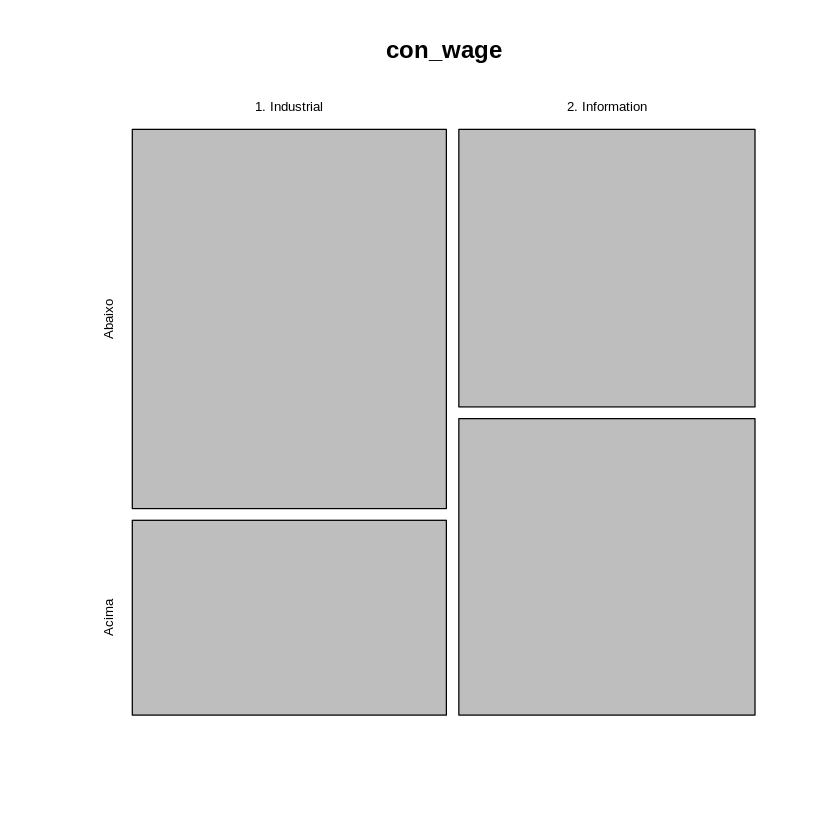

In [61]:
Wage$wage_cat = as.factor(ifelse(Wage$wage > mean(Wage$wage), "Acima", "Abaixo"))

con_wage = table(Wage$jobclass,Wage$wage_cat)

print(con_wage)
mosaicplot(con_wage)

In [62]:
addmargins(con_wage)

,Abaixo,Acima,Sum
1. Industrial,1020,524,1544
2. Information,704,752,1456
Sum,1724,1276,3000


Assim, a probabilidade de que um indivíduo tenha uma remuneração abaixo da média tal que ele trabalhe no setor Industrial é dada por:


$$ P(\text{Abaixo} | \text{Indutrial}) = \frac{ P(\text{Abaixo} \cap  \text{Indutrial}) }{P(\text{Industrial})} = \frac{ \frac{1020}{3000} }{ \frac{1544}{3000}} = \frac{1020}{1544} = 0.6606$$



In [64]:
1020/ 1544

[1] 0.6606218

Que é exatamente a probabilidade marginal obtida pelas linhas.

In [66]:
addmargins(prop.table(con_wage, margin=1))

,Abaixo,Acima,Sum
1. Industrial,0.6606218,0.3393782,1
2. Information,0.4835165,0.5164835,1
Sum,1.1441382,0.8558618,2


# Eventos Independentes

A independência de eventos é uma hipótese muitas vezes empregada na modelagem estatística pois permite reduzir a complexidade da análise ao tratar cada eventos separadamente. 

Dizemos que $A$ e $B$ são dois eventos independentes se $P(A|B) = P(A)$, e neste caso, podemos escrever:

$$ P(A \cap B) = P(A|B) . P(B) = P(A) . P(B)$$

Essa é uma regra muito útil mesmo em casos em que a independência não é totalmente garantida. Considere que a probabilidade de comprarmos uma lâmpada com defeito, evento seja de 1/1000. Qual a probabilidade de comprarmos duas lâmpadas com defeito? 

$$ P(A \cap B) = P(A|B) . P(B) = P(A) . P(B) = \frac{1}{10^3} . \frac{1}{10^3} = \frac{1}{10^6} $$

Na verdade aqui assumimos uma simplificação que na prática é frequentemente usada. Nós assumimos que $P(A|B) = P(A)$, mas a segunda lâmpada só teria probabilidade 1/1000 se garantíssimos a reposição da primeira lâmpada no espaço amostral. Assumimos que os eventos são independentes (o que só se verificaria, de fato, com a reposição). 




# Teorema de Bayes

O Teorema de Bayes é um importante teorema de Probabilidades que permite atualizarmos as probabilidades à medida que aprendemos ou adicionamos novas informações sobre os dados. Isso leva a uma forma um pouco diferente de se lidar com probabilidade dando origem ao que chamamos uma abordagem *bayesiana*, para diferenciá-la da aboradagem *frequentista* que adotamos até aqui. Essas duas abordagens levam a métodos bastante distintos de inferência estatística, mas que não abordaremos aqui. Vale, entretanto, entender esse importante teorema para que você possa aplicá-lo caso seja necessário no futuro. 

A expressão do Teorema de Bayes pode ser derivada da regra da cadeia que você conheceu acima. Pela regra da cadeia podemos escrever:

$$ P(A \cap B) = P(A|B) . P(B) $$

como também,

$$ P(A \cap B) = P(B|A) . P(A) $$

Igualando as duas expressões obtemos:

$$  P(A|B) . P(B) = P(B|A) . P(A) $$

E chegamos à famosa expressão do Teorema de Bayes:

$$  P(A|B)  = \frac{ P(B|A) . P(A) }{ P(B) }$$

# Regra de Bayes e um Teste de Diagnóstico

Para entender melhor as probabilidades condicionais e sua importância vamos considerar um exemplo envolvendo exames diagnósticos do vírus da imunodeficiência humana (HIV) e aplicar o que aprendemos até aqui.

Quando são realizados testes de diagnóstico sempre existe uma margem de erro associada a esses testes. Dada a gravidade da doença falsos positivos ou falsos negativos no teste de HIV são altamente preocupantes. Um falso positivo é quando o teste retorna positivo quando na verdade a pessoa não está com a doença, mas estaríamos dizendo erroneamente que a essa pessoa contraiu essa doença grave. Um falso negativo é quando o teste retorna negativo enquanto a verdade é positivo. Neste caso estaríamos dizendo que a pessoa está saudável quando na verdade está gravemente doente, com risco maior para ela por não buscar tratamento além de não alertá-la para transmissão para outras pessoas. Para avaliarmos esses erros, então, é importante termos em mente:

1. **Verdadeiros positivos (VP)**, paciente doente identificado pelo teste

2. **Verdadeiros negativos (VN)**, paciente saudável identificado pelo teste

3. **Falsos positivos (FP)**, paciente saudável mas que o teste erroneamente indica com HIV 

4. **Falsos negativos (FN)**, paciente com HIV mas que o teste erroneamente indica saudável

A probabilidade de um falso positivo, se na verdade for negativo, é chamada de taxa de falso positivo e a taxa de falso negativo é a probabilidade de um falso negativo se na verdade for positivo. Ambas as taxas são probabilidades condicionais: A taxa de falsos positivos de um teste de HIV é a probabilidade de um resultado positivo condicionado ao fato de a pessoa testada não ter HIV.

Você gostaría de saber a probabilidade de alguém ter HIV se o teste for positivo. Para simplificar as expressões vamos chamar de $H$ o evento de que a pessoa tem HIV e $T$ retorno positivo do teste. Vamos então precisar das seguintes informações que são dados fornecidos por estimativas: 

1. A taxa de verdadeiro positivo do teste que é conhecida como **sensibilidade**, *recall* ou probabilidade de detecção, é estimada em:

$$ P(T| H) = 0.98 $$


2. A taxa de verdadeiro negativo conhecida como **especificidade** estimada em:

$$ P( \lnot T | \lnot H ) = 0.94 $$

onde o sinal de $\lnot$  indica a negação. 

3. A presença de HIV na população, estimada em:

$$ P(H) = 0.01$$

Vamos supor então que você deseja calcular a probabilidade do paciente ter HIV se o teste for positivo, ou seja,  

$$ P( H | T ) $$

Pelo Teorema de Bayes podemos escrever:

$$ P( H | T ) = \frac{P(H) P(T|H)}{P(T)} = \frac{0.0148 \times 0.98}{P(T)} $$

Mas ainda não temos $P(T)$ o que, entretanto, pode ser obtida pela lei probabilidade total (Axioma A3, 'soma 1'):

$$ P(T) = P(H) P(T|H) + P( \lnot H)P(T | \lnot H) =$$

e as probabilidades faltantes podendo ser obtidas da regra do complemento ($P(E) = 1 - P(\bar{E})$:

$$ P(T) = P(H) P(T|H) + (1 - P(H)) ( 1 - P( \lnot T | \lnot H)) =$$
$$0.01 \times 0.98 + (1 - 0.01) \times ( 1 - 0.94) = $$
$$0.01 \times 0.98 + 0.99 \times 0.06 = 0.0692$$

E portanto, 

$$ P( H | T ) = \frac{P(H) P(T|H)}{P(T)} = \frac{0.01 \times 0.98}{0.0692} = 0.1416$$

Portanto, embora o paciente tenha testado positivo para HIV, ele tem apenas 14,16% de chance de realmente ter HIV. Muitos outros cálculos semelhantes podem ser feitos e com aplicações em uma série de problemas. Mas aqui é suficiente que você entenda o que é e como podem ser empregadas as probabilidades condicionadas e o Teorema de Bayes.



# Entropia e Informação Mútua

Informações mútuas e Ganho de informações são basicamente a mesma coisa, embora o contexto dê preferência ao emprego de um nome ou outro. Essa é uma medida  calculada entre duas variáveis que mede a redução da incerteza de uma variável dado o valor conhecido da outra. Em outras palavras, se soubermos o valor de um atributo o que podemos afirmar sobre um outro atributo. Algo bastante semelhante a probabilidade condicional e tudo que você estudou até aqui nesta aula, não? 

O cálculo de informações mútuas é particularmente importante para seleção de atributos em problemas de aprendizado de máquina que você verá mais adiante no curso. Com ele você pode determinar que atributos mais contribuem para determinar um outro atributo, por exemplo, um atributo classe ou um valor. Por exemplo, você pode estar interessado em qual atributo mais contribui (ganho de informação!) para determinar a classe de um tumor como maligno ou benigno no dataframe `biopsy`, ou qual atributo mais influencia o preço de um veículo na base `Cars93`.




In [81]:
library(MASS)
head(biopsy)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign
6,1017122,8,10,10,8,7,10,9,7,1,malignant


In [82]:
head(Cars93)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,⋯,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,⋯,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,⋯,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,⋯,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,⋯,6,189,105,69,41,28.0,16,2880,USA,Buick Century


Essa certamente é uma informação de Análise Exploratória dos Dados bastante útil e que você poderá empregar muitas vezes daqui por diante no curso. Vamos então ver como obter esses valores a partir do conceito inicial de Entropia.

## Entropia

A Entropia (Entropia de Shannon) é uma medida de quantidade de informação. Ela não é ainda a informação mútua ou o ganho de informação. A Entropia é uma quantidade de informação e é medida sobre um único atributo (a informação mútua é uma medida de relação entre dois atributos). A Entropia $E(s)$ de $s$ é definida como: 

$$ E(s) = - \sum_i p_i \log p_i $$

onde $p_i$ representa as probabilidades dos possíveis valores de $s$. Assim,  

$$ E(\text{constante}) = - 1 \log 1 = 0 $$

pois um dado constante não traz qualquer informação e, 

$$ E(\text{bit}) = - 1/2 \log 1/2 - 1/2 \log 1/2 = 1 $$

o que corresponde à noção comum de que o *bit* é a unidade de informação.  

Por exemplo a Entropia do atributo `class` de `biopsy` pode ser diretamente calculado como:





In [114]:
p = prop.table(table(biopsy$class))
p


   benign malignant 
0.6552217 0.3447783 

In [115]:
E_class =  - p[1] * log( p[1]) - p[2] * log( p[2])
print(E_class)

   benign 
0.6441541 


## Informação Mútua ou Ganho de Informação

Mas, não obstante a importância conceitual da entropia, a Informação Mútua ou Ganho de Informação desempenha um papel muito mais prático e importante. O ganho de informação que um atributo $A$ carrega para determinar o valor de um atributo objetivo (*target*) $T$ pode ser expresso em termos de Entropia como: 

$$ IG(A,T) = E(T) - \sum_i p_i E(T | a_i) $$

Onde $\sum_i p_i E(T | a_i)$ é pode ser entendido como uma média ponderada de da Entropia de $T$ para cada valor $a_i$ de $A$. A figura a seguir ilustra o cálculo do ganho de informação do atributo `Hello` para o atributo objetivo `Spam`. 

![imagem](https://github.com/Rogerio-mack/Analise_Exploratoria_de_Dados/blob/main/figuras/EntropiaGanhoInformacao.png?raw=true)

No exemplo o ganho de informação obtido é 0 apenas por que, idenpendentemente do valor de `Hello` (a presença do termo `Hello` em um email) mantêm as mesmas proporções de casos de spam e não spam de antes de termos essa informação.

> Nota: em geral a informação mútua emprega a entropia, mas o ganho de informação ainda pode ser calculado empregando-se outros valores diferentes da entropia como o Índice Gini:

$$ Gini(s) = 1 - \sum_i p_i $$ 

> Ou o erro de classificação: 

$$ CE(s) = 1 - \max p_i $$

> Neste caso os valores $Gini(s)$ e $CE(s)$, substituem os valores de entropia $E(s)$ acima. Obviamente os valores obtidos são diferentes, mas sendo medidas relativas eles permitem igualmente calcular a diferença de ganho entre diferentes atributos. Você poderá ver isso mais adiante no curso quando estudar modelos de Árvores de Decisão que podem empregar esses diferentes critérios para a seleção dos atributos da Árvore. 

Felizmente em R (e também em Python) esses cálculos podem ser obtidos pela simples chamada de uma função. Existem vários pacotes que podem ser empregados e aqui empregaremos o pacote `infotheo` que permite também o cálculo de entropia.

In [117]:
install.packages('infotheo')
library(infotheo)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Calculo da entropia de `biopsy$class` corresponde exatamente ao cálculo que fizemos antes,

In [120]:
entropy(biopsy$class)

[1] 0.6441541

E o nosso exemplo, Hello/Spam pode igualmente calculado como:

In [121]:
mutinformation(c('n','n','n','n','y','y'),c('y','y','n','n','y','n'))

[1] 0

# Feature Selection

Podemos agora empregar o cálculo de informação mútua para selecionar os 5 atributos de `biopsy` mais relevantes para determinar a classe maligno/benigno dos tumores.

In [130]:
ig = data.frame(features = names(biopsy)[3:ncol(biopsy)-1], ig = 0 )

In [131]:
ig

features,ig
<chr>,<dbl>
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [133]:
for (i in ig$features){
  cat( i , mutinformation(biopsy[,i],biopsy$class) , '\n' )
  ig[ ig$features == i,]$ig = mutinformation(biopsy[,i],biopsy$class)
}  

V1 0.3221251 
V2 0.4742989 
V3 0.4581513 
V4 0.3112337 
V5 0.3563409 
V6 0.4147862 
V7 0.3796811 
V8 0.3295728 
V9 0.145647 


In [136]:
ig[order(-ig$ig),]

,features,ig
,<chr>,<dbl>
2,V2,0.4742989
3,V3,0.4581513
6,V6,0.4147862
7,V7,0.3796811
5,V5,0.3563409
8,V8,0.3295728
1,V1,0.3221251
4,V4,0.3112337
9,V9,0.1456470


O pacote `infotheo` não permite o cálculo de informação mútua para valores contínuos como o preço dos veículos em `Cars93`, mas existem outros pacotes e até mesmo em Python,  deixamos isso como um exercício para você e você pode empregar as indicações que deixamos mais abaixo. 

# Para Saber Mais

1. Acesse https://www.kaggle.com/ryanholbrook/mutual-information empregue o modelo de código fornecido para calcular os atributos que mais trazem informação sobre o preço dos veículos na base `Cars93` (Dica: crie a base Cars93 em Python para empregar as funções do exemplo em Python). 

2. Acesse  Sun, Dennis. **Introduction to Probability**  em: https://dlsun.github.io/probability/ e leia o capítulo 9 para descobrir como interpretar geometricamente a Lei de Bayes.

3. As Probabilidades Condicionais e o pensamento Baysiano não são tão intuitivas como o pensamento frequentista de probabilidade. Acesse esse texto **Monty Hall Problem** em https://brilliant.org/wiki/monty-hall-problem/?quiz=monty-hall e conheça um caso clássico onde o pensamento bayesiano leva um um resultado bastante contra-intuitivo, embora seja algo que podemos observar na prática.

3. Esse é um tema bastante avançado, mas se você quiser saber sobre distribuições de probabilidade no modelo Baysiano, pode acessar essa introdução que ainda traz códigos em R: **Bayesian models in R** https://www.r-bloggers.com/2019/05/bayesian-models-in-r-2/ 

# Referências

1. Sun, Dennis. **Introduction to Probability**. Disponível em: https://dlsun.github.io/probability/  Acesso: 20 de setembro de 2021.

1. Clyde, M., C-Rundel, M., Rundel, C., Banks, D., Chai, C., Huang, L. **An Introduction to Bayesian Thinking: A Companion to the Statistics with R Course** Disponível em:https://statswithr.github.io/book/  Acesso: 20 de setembro de 2021.

1. Freire, Sergio Miranda. **Bioestatística Básica**. disponível em: http://www.lampada.uerj.br/arquivosdb/_book/bioestatisticaBasica.html. Acesso: 10/04/2021.

1. Pipis, G. (2020) **Contingency Tables in R**. Disponível em: https://predictivehacks.com/contingency-tables-in-r/ Acesso: 19.09.2021 

1. Devore, Jay L. **Probabilidade e Estatística para Engenharia e Ciências**. Trad. Solange Aparecida Visconte. Cengage, 2018.

1. Navarro, Danielle, **Learning Statistics with R**, disponível em: https://learningstatisticswithr.com/ ( LSR version 0.6 (pdf) ). Acesso: 26/02/2021. Alternativamente em formato bookdown: https://learningstatisticswithr.com/book/ Acesso: 07/03/2021.

